In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
df = df.drop(['Unnamed: 0'],axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
drop_values = ['M','K']
df = df[~df['NA_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_values))]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15813 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15813 non-null  object 
 1   Platform     15813 non-null  object 
 2   Year         15559 non-null  float64
 3   Genre        15765 non-null  object 
 4   Publisher    15756 non-null  object 
 5   NA_Sales     15813 non-null  float64
 6   EU_Sales     15813 non-null  float64
 7   JP_Sales     15813 non-null  float64
 8   Other_Sales  15813 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

Name             0
Platform         0
Year           254
Genre           48
Publisher       57
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
df = df.dropna(axis=0)
df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
15471,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
15472,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
15473,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15474,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
def revision(a):
  if (a >= 0) and (a < 20):
    return int(2000+a)
  elif (a > 30) and (a < 1000):
    return int(1900 + a)
  else:
    return int(a)

df["Year"] = df['Year'].apply(revision)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
15471,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
15472,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
15473,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15474,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,15476.000000,15476.000000,15476.000000,15476.000000,15476.000000
mean,2006.403851,0.263680,0.146372,0.077810,0.048344
std,5.834873,0.824188,0.510354,0.309821,0.192612
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2017.000000,41.490000,29.020000,10.220000,10.570000


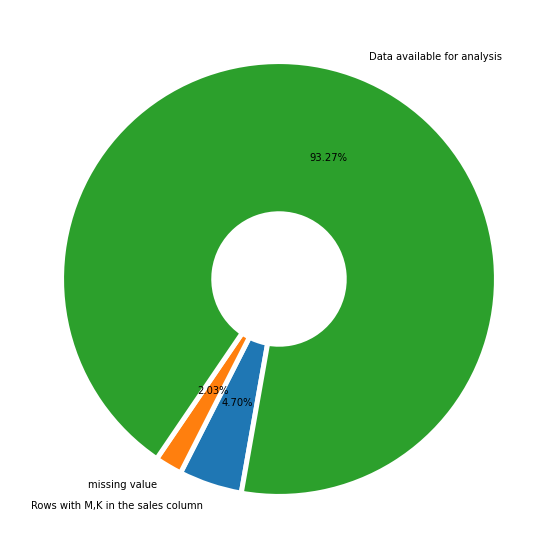

In [9]:
ratio = ['4.7','2.03','93.27']
labels = ['Rows with M,K in the sales column','missing value','Data available for analysis']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(15, 10))
plt.pie(ratio, labels=labels, autopct='%.2f%%',startangle=260, counterclock=False,wedgeprops=wedgeprops)
plt.show()

In [10]:
num_platform = df['Platform'].unique()
print(len(num_platform))
num_platform

31


array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'GBA', 'PS4', 'PS2', 'PS', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
15471,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
15472,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
15473,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
15474,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


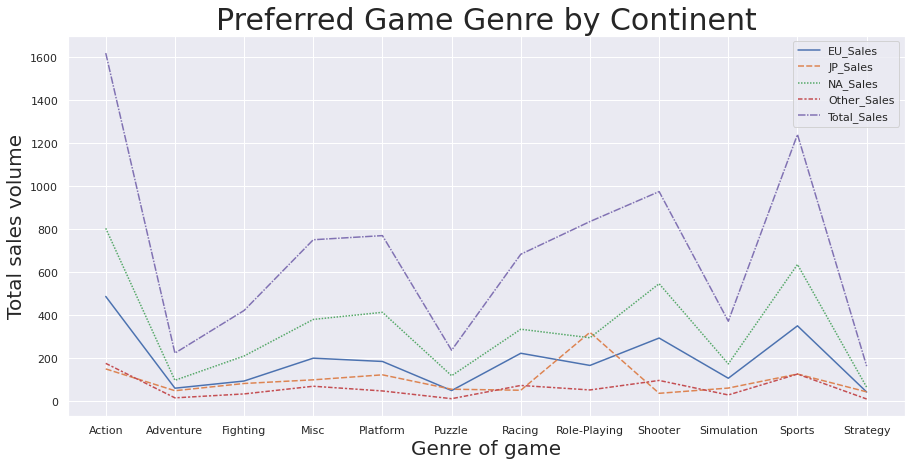

In [12]:
df_genre = df.groupby(by=['Genre'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
df_genre = df_genre.reset_index()

df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum() # 북미대륙 선호 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽대륙 선호 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() # 일본대륙 선호 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() # 그밖의 대륙 선호 게임 장르
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

sns.set(style='darkgrid')
plt.figure(figsize=(15, 7))
plt.title("Preferred Game Genre by Continent", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize = 20)

sns.lineplot(data=df_genre);


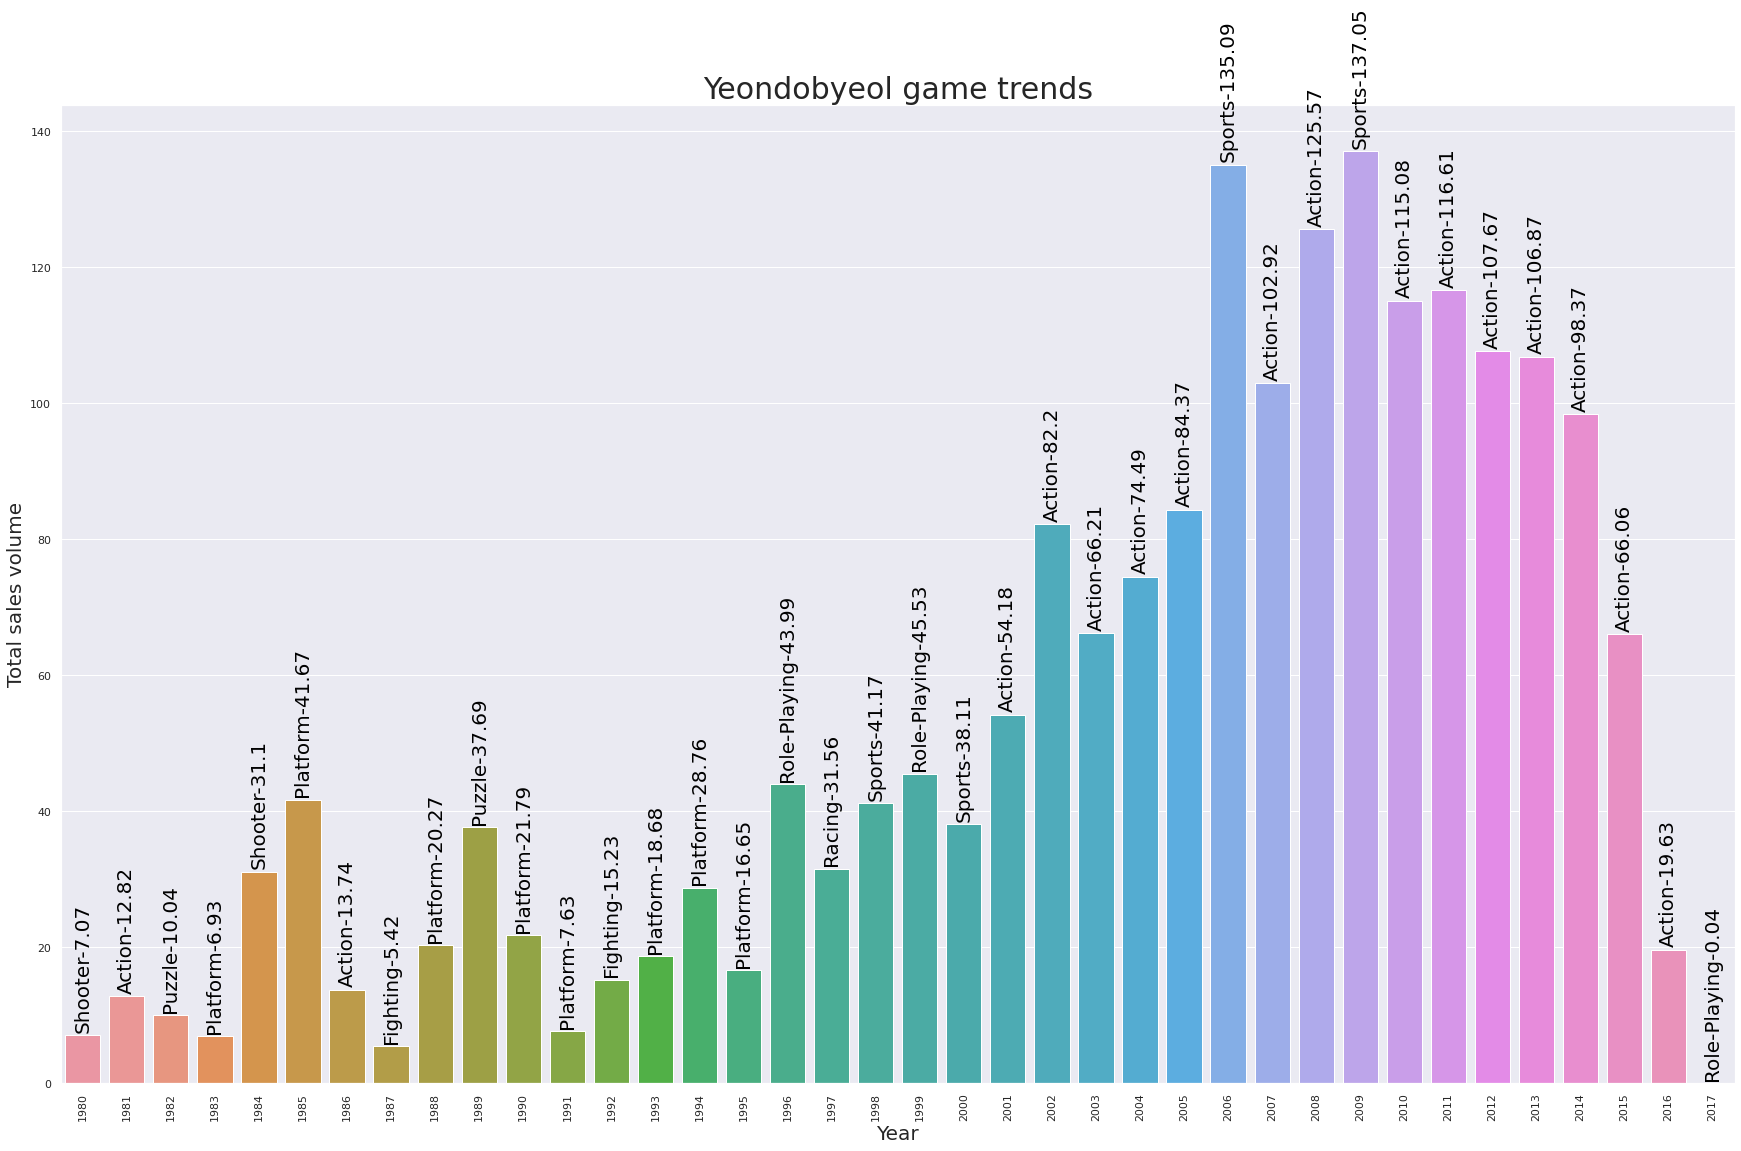

In [13]:
year_sale_dx = df.groupby(by=['Year','Genre'])['Total_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])["Total_Sales"].transform(max) == year_sale_dx['Total_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year',y='Total_Sales',data=year_sale_max)
index = 0
for value in year_sale_max['Total_Sales']:
  g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
  index +=1

plt.title('Yeondobyeol game trends', fontsize=30)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Total sales volume', fontsize=20)

plt.xticks(rotation=90)
plt.show()

In [14]:
sortdf = df.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = sortdf.head(20)
top_game_sale = top_game_sale[['Name','Year','Genre','Total_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale

,Name,Year,Genre,Total_Sales
0,Wii Sports,2006,Sports,82.74
1,Super Mario Bros.,1985,Platform,40.24
2,Mario Kart Wii,2008,Racing,35.83
3,Wii Sports Resort,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,31.38
5,Tetris,1989,Puzzle,30.26
6,New Super Mario Bros.,2006,Platform,30.01
7,Wii Play,2006,Misc,29.01
8,New Super Mario Bros. Wii,2009,Platform,28.61
9,Duck Hunt,1984,Shooter,28.31


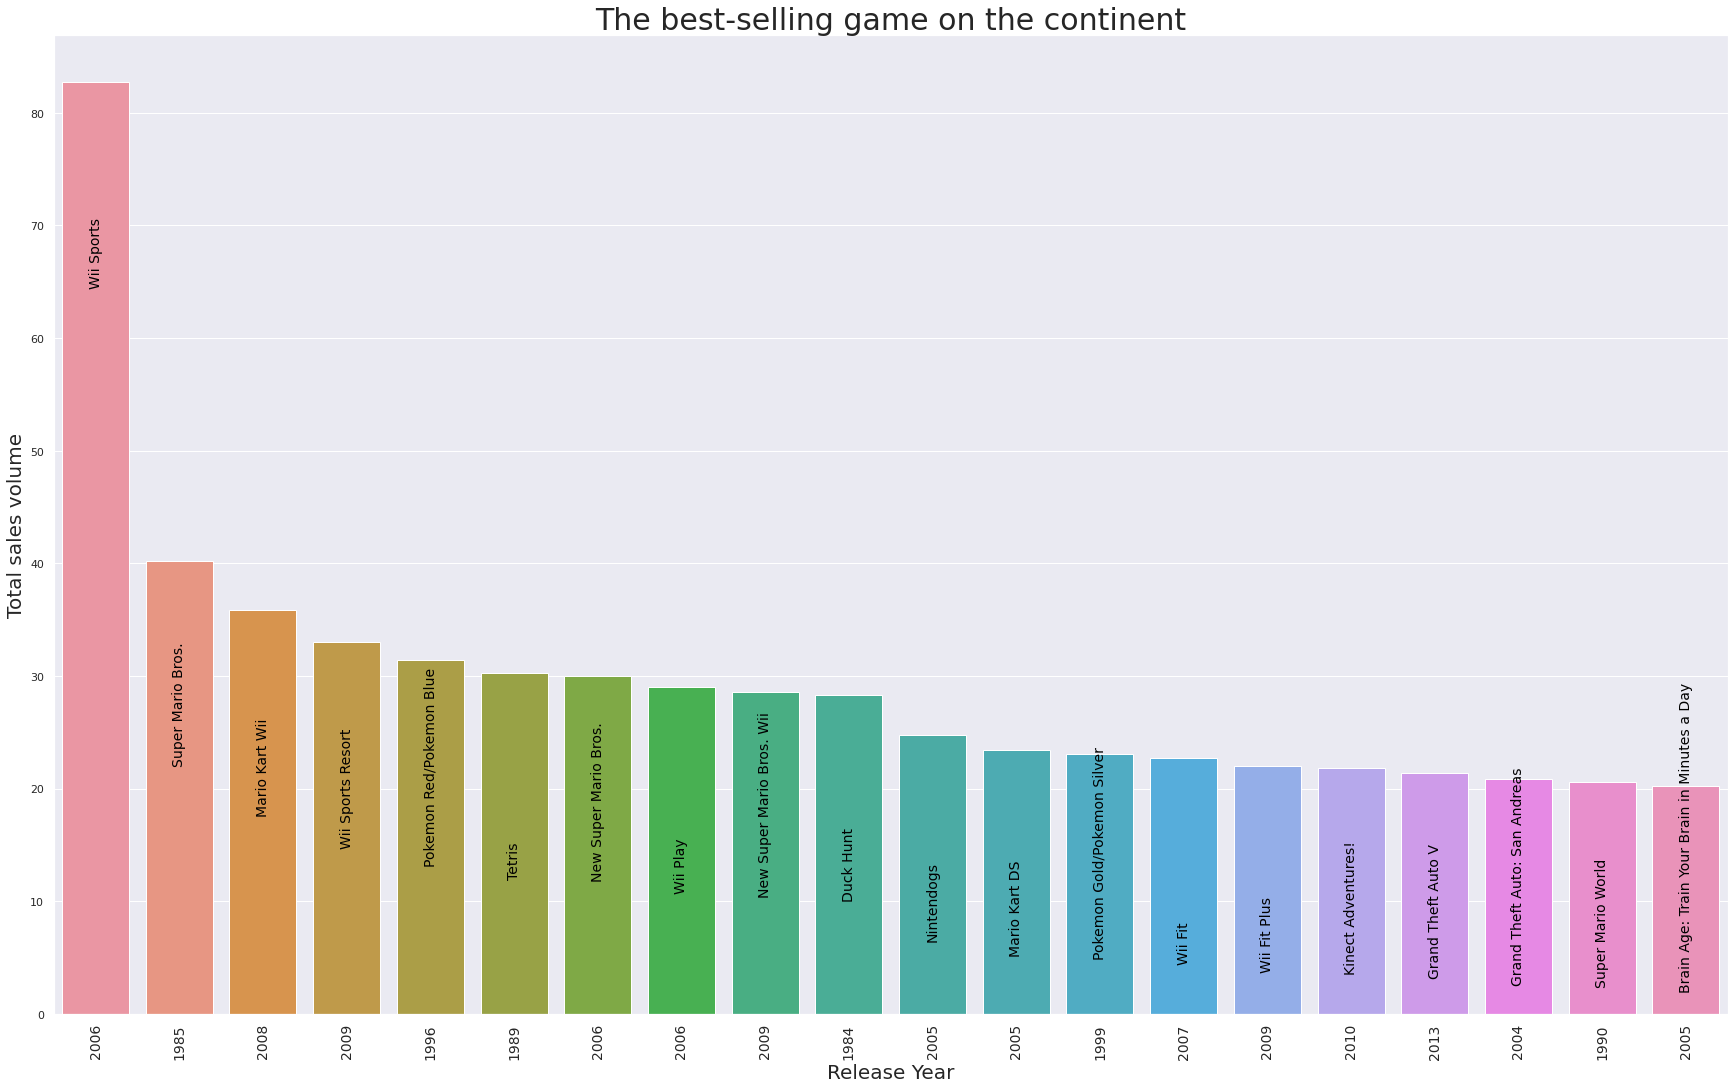

In [15]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(30,18))
g = sns.barplot(x='Name', y='Total_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Total_Sales']:
    g.text(index, value - 18, name[index], color ='#000',size=14, rotation=90, ha = 'center')
    index +=1

plt.xticks(y, top_game_sale['Year'],fontsize=14, rotation = 90)
plt.title('The best-selling game on the continent', fontsize = 30)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Total sales volume',fontsize=20)
plt.show()

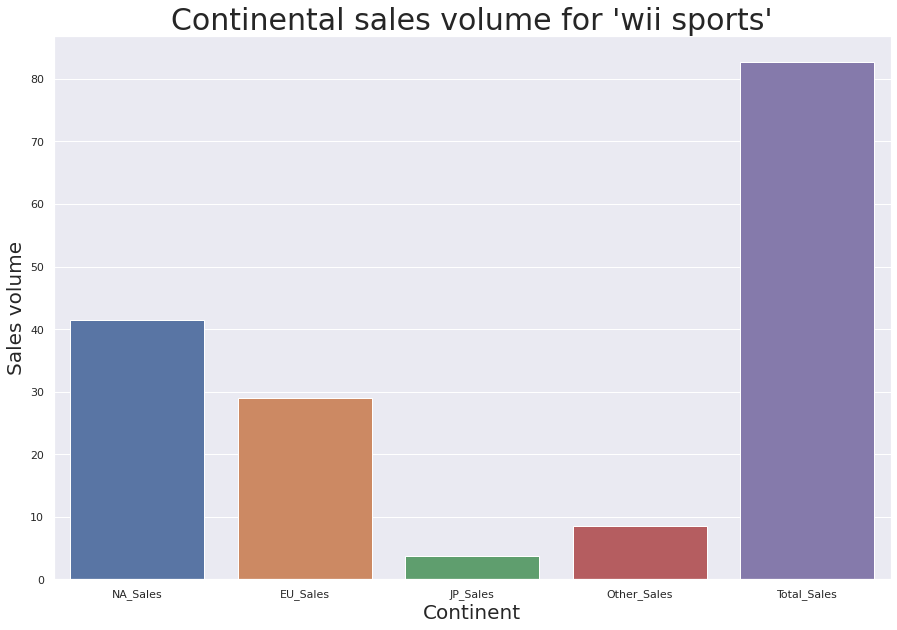

In [16]:
df_1st = df[df['Name'] == 'Wii Sports']
df_1st = df_1st.drop(['Year'],axis = 1)
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Continental sales volume for 'wii sports'", fontsize=30)
plt.xlabel('Continent',fontsize = 20)
plt.ylabel('Sales volume',fontsize=20)

sns.barplot(data=df_1st);

In [17]:
df_FA = (df[df['Name'].str.contains('FIFA')])
df_FA

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
36,FIFA World Cup Germany 2006,XB,2006,Sports,Electronic Arts,0.18,0.05,0.00,0.01,0.24
130,FIFA Manager 12,PC,2011,Sports,Electronic Arts,0.00,0.03,0.00,0.01,0.04
170,FIFA Soccer,PSP,2005,Sports,Electronic Arts,0.11,0.00,0.00,0.01,0.12
193,FIFA Street 2,GC,2006,Sports,Electronic Arts,0.09,0.02,0.00,0.00,0.11
268,FIFA Soccer 2005,GC,2004,Sports,Electronic Arts,0.11,0.03,0.00,0.00,0.14
...,...,...,...,...,...,...,...,...,...,...
14946,FIFA Soccer 06,PSP,2005,Sports,Electronic Arts,0.10,0.01,0.00,0.01,0.12
15031,FIFA Soccer 64,N64,1997,Sports,Electronic Arts,0.16,0.30,0.00,0.03,0.49
15162,FIFA 12,PSP,2011,Sports,Electronic Arts,0.12,0.26,0.02,0.14,0.54
15235,FIFA 17,XOne,2016,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53


In [18]:
df_MK = (df[df['Name'].str.contains('Mario')])
df_MK

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
31,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
237,Mario Golf,N64,1999,Action,Nintendo,0.62,0.18,0.65,0.02,1.47
361,Mario & Sonic at the Olympic Games,DS,2008,Sports,Sega,1.64,2.48,0.44,0.58,5.14
401,Mario Party,N64,1998,Misc,Nintendo,1.25,0.53,0.87,0.05,2.70
433,Mario's Picross,GB,1995,Puzzle,Nintendo,0.00,0.00,0.62,0.00,0.62
...,...,...,...,...,...,...,...,...,...,...
14673,Paper Mario,N64,2000,Role-Playing,Nintendo,0.58,0.18,0.59,0.02,1.37
14805,Mario Super Sluggers,Wii,2008,Sports,Nintendo,1.51,0.00,0.29,0.12,1.92
15018,Mario Superstar Baseball,GC,2005,Sports,Nintendo,0.93,0.24,0.25,0.04,1.46
15400,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70


In [19]:
print(df_MK['NA_Sales'].sum())
print(df_MK['EU_Sales'].sum())
print(df_MK['JP_Sales'].sum())
print(df_MK['Other_Sales'].sum())
print(df_MK['Total_Sales'].sum())
# 마리오 시리즈 대륙별 판매액을 계산

253.42000000000002
121.66
107.35
28.759999999999998
511.19


In [20]:
print(df_FA['NA_Sales'].sum())
print(df_FA['EU_Sales'].sum())
print(df_FA['JP_Sales'].sum())
print(df_FA['Other_Sales'].sum())
print(df_FA['Total_Sales'].sum())
# 피파시리즈의 대륙별 판매액을 계산

30.870000000000005
93.16
2.41
29.619999999999997
156.06


In [21]:
MK_list = [253.42000000000002,121.66,107.35,28.759999999999998,511.19]
FA_list = [30.870000000000005,93.16,2.41,29.619999999999997,156.06]
MF_ = pd.DataFrame({'Mario Series':MK_list,'FIFA Series':FA_list}, index = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'])
MF_

,Mario Series,FIFA Series
NA_Sales,253.42,30.87
EU_Sales,121.66,93.16
JP_Sales,107.35,2.41
Other_Sales,28.76,29.62
Total_Sales,511.19,156.06


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


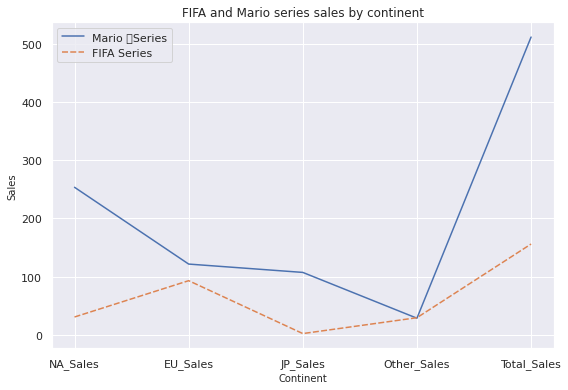

In [22]:
plt.figure(figsize=(9,6))
plt.title('FIFA and Mario series sales by continent',fontsize=12)
plt.xlabel('Continent', fontsize = 10)
plt.ylabel('Sales',fontsize=10)

sns.lineplot(data=MF_); 
# 아래 그래프로 보았을때 전체적으로 마리오시리즈가 FIFA시리즈 보다 월등히 높다는것을 알수있다.

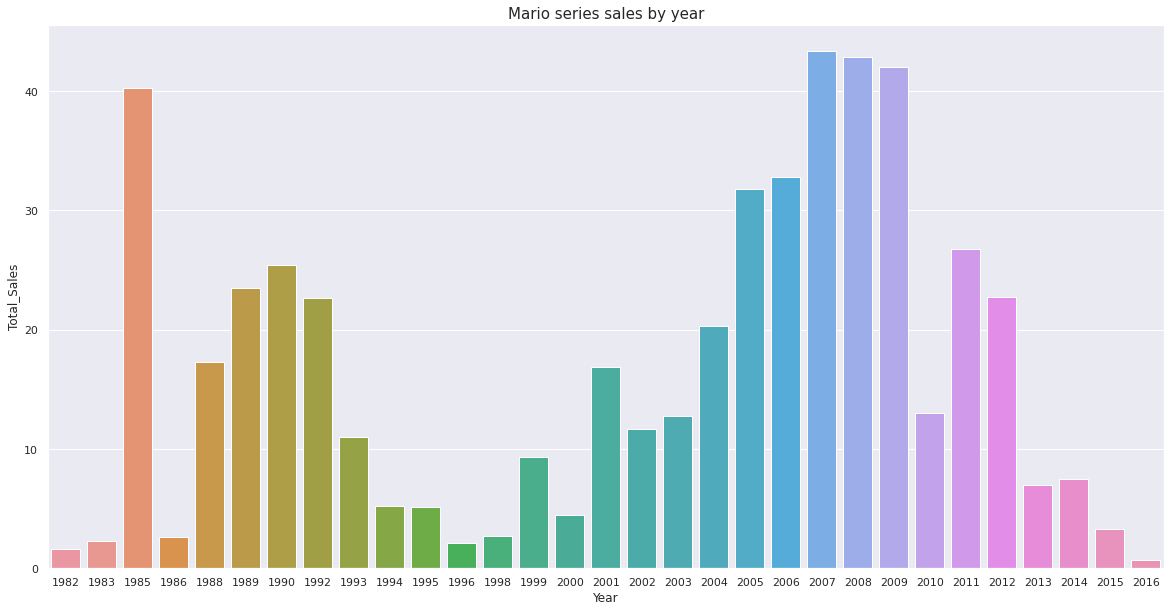

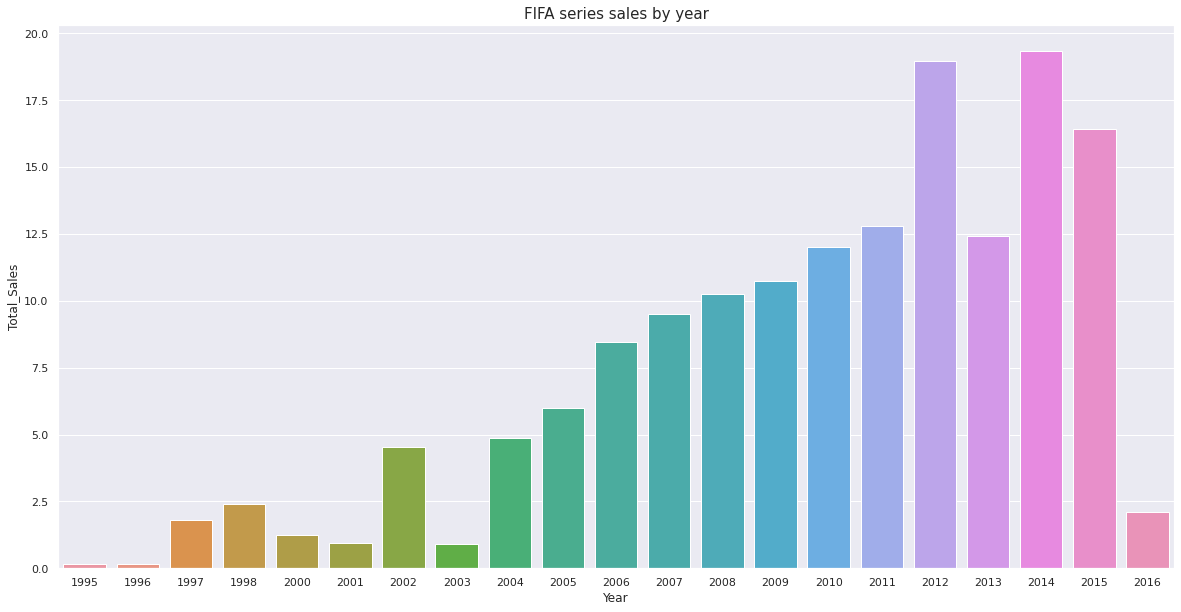

In [23]:
dsyear = df_MK.groupby('Year').sum()
dsyear = dsyear[['Total_Sales']]
dsyear = dsyear.reset_index()
plt.figure(figsize=(20,10))
plt.title('Mario series sales by year',fontsize = 15)
plt.xlabel("Total_Sales",fontsize=12)
plt.ylabel("Year",fontsize=12)
sns.barplot(x="Year",y='Total_Sales',data=dsyear)

FAyear = df_FA.groupby('Year').sum()
FAyear = FAyear[['Total_Sales']]
FAyear = FAyear.reset_index()
plt.figure(figsize=(20,10))
plt.title('FIFA series sales by year',fontsize = 15)
plt.xlabel("Total_Sales",fontsize=12)
plt.ylabel("Year",fontsize=12)
sns.barplot(x="Year",y='Total_Sales',data=FAyear)
# 아래그래프를 살펴보면 전체적인 판매량이 마리오시리즈가 높은것을 알수있다.
# 하지만 FIFA시리즈도 세계인이 함께하는 축제인 월드컵이 개최되는 년도이면 수요가 급증한다. 또한 전 월드컵보다 꾸준히 상승하는것으로 보아 장기적으로 본다면 마리오시리즈보다 
# FIFA시리즈가 판매량을 추월할것이라고 생각한다.